# Project for FaceSwap

## Set up the libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import dlib
from google.colab.patches import cv2_imshow

## Get two Images

In [2]:
# Get two random images
!wget https://upload.wikimedia.org/wikipedia/commons/5/5d/Jusuf_Kalla_Vice_President_Portrait_2014.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/1/16/Official_Portrait_of_President_Reagan_1981.jpg

--2023-02-06 12:09:57--  https://upload.wikimedia.org/wikipedia/commons/5/5d/Jusuf_Kalla_Vice_President_Portrait_2014.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1234870 (1.2M) [image/jpeg]
Saving to: ‘Jusuf_Kalla_Vice_President_Portrait_2014.jpg’

Jusuf_Kalla_Vice_Pr 100%[===================>]   1.18M  --.-KB/s    in 0.08s   

2023-02-06 12:09:57 (14.1 MB/s) - ‘Jusuf_Kalla_Vice_President_Portrait_2014.jpg’ saved [1234870/1234870]

--2023-02-06 12:09:57--  https://upload.wikimedia.org/wikipedia/commons/1/16/Official_Portrait_of_President_Reagan_1981.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

## Simple Implementation Swap

### Use Haarscade Classifiers for simple faceswap

In [3]:
# Get the classifiers
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_eye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml

--2023-02-06 12:10:00--  https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.04s   

2023-02-06 12:10:00 (8.99 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]

--2023-02-06 12:10:00--  https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [4]:
# Load the two images
img1 = cv2.imread('Jusuf_Kalla_Vice_President_Portrait_2014.jpg')
img2 = cv2.imread('Official_Portrait_of_President_Reagan_1981.jpg')

# Set a width and height
w=512
h=512

# Resize to a common size
img1 = cv2.resize(img1, (w, h))
img2 = cv2.resize(img2, (w, h))

# Convert to grayscale
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray_img1.shape, gray_img2.shape

((512, 512), (512, 512))

In [5]:
# Detect faces in both images using a face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

faces1 = face_cascade.detectMultiScale(gray_img1, 1.3, 5, minSize=(120, 120))
faces2 = face_cascade.detectMultiScale(gray_img2, 1.3, 5, minSize=(120, 120))
print(len(faces1), len(faces2))

# Extract the face region from both images
for (x, y, w, h) in faces1:
    face1 = img1[y:y+h, x:x+w]

for (x, y, w, h) in faces2:
    face2 = img2[y:y+h, x:x+w]

1 1


(172, 172, 3) (172, 172, 3)


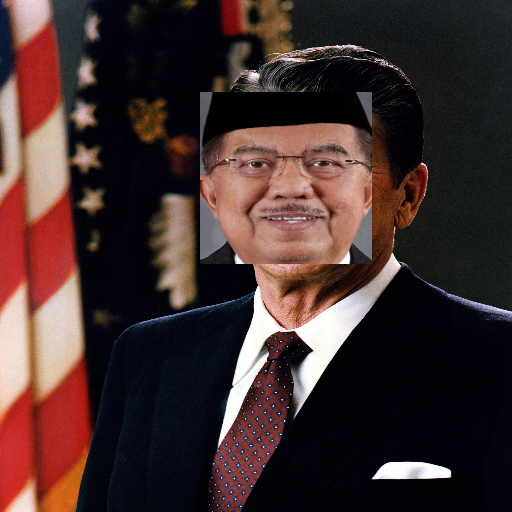

In [9]:
# Align both faces
face1 = cv2.resize(face1, (w, h))
face2 = cv2.resize(face2, (w, h))
print(face1.shape, face2.shape)

# Replace one face with the other
img2[y:y+h, x:x+w] = face1
cv2_imshow(img2)

## Improve with DLIB

In [10]:
!wget  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2023-02-06 12:10:55--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  52.6MB/s    in 1.2s    

2023-02-06 12:10:56 (52.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



### Read the Image

In [11]:
import cv2
import dlib
import numpy as np

# Load the images
img1 = cv2.imread('Jusuf_Kalla_Vice_President_Portrait_2014.jpg')
img2 = cv2.imread('Official_Portrait_of_President_Reagan_1981.jpg')

# Set a width and height
w=512
h=512

# Resize to a common size
img1 = cv2.resize(img1, (w, h))
img2 = cv2.resize(img2, (w, h))

# Convert to grayscale
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

### Use the Facial Landmark Detectors

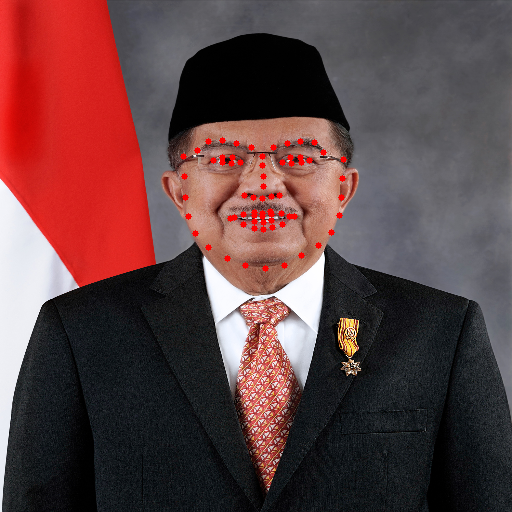

In [12]:
# Load the face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Set a drawing copy to display each step
draw_copy = img1.copy()

# Extract the face landmarks from both images
# Face 1
faces = detector(gray_img1)
for face in faces:
    landmarks = predictor(gray_img1, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        cv2.circle(draw_copy, (x,y), 3, (0, 0, 255), -1)

# Check Results so far
cv2_imshow(draw_copy)

### Convex Hull

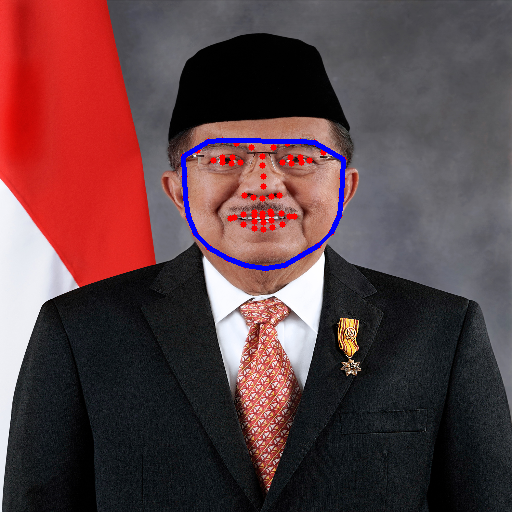

In [13]:
points = np.array(landmarks_points, np.int32)

# Compute the convex hull of the face landmarks
hull1 = cv2.convexHull(np.array(landmarks_points))
cv2.polylines(draw_copy,[hull1], True, (255, 0, 0), 3)

# Check Results so far
cv2_imshow(draw_copy)

## Mask of source image

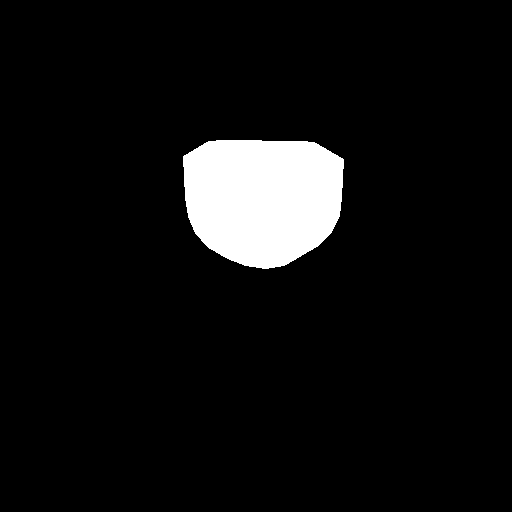

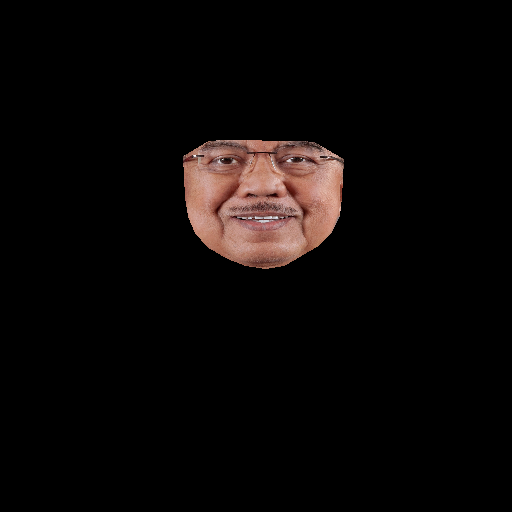

In [14]:
mask = np.zeros_like(gray_img1)
cv2.fillConvexPoly(mask, hull1, 255)
cv2_imshow(mask)

face_image_1 = cv2.bitwise_and(img1, img1, mask=mask)
cv2_imshow(face_image_1)

### Delaunay Triangulation

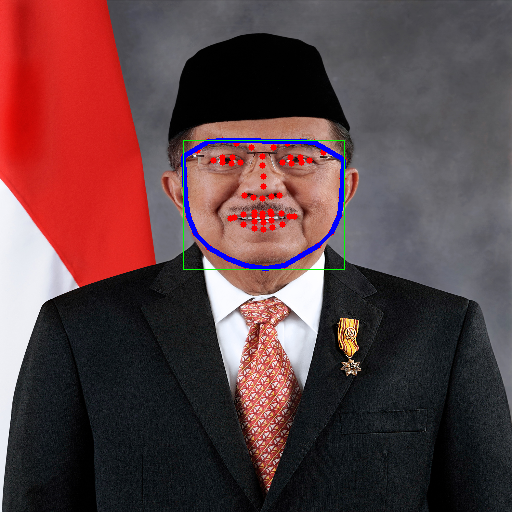


Points of the triangles
[[197 150 184 176 183 156]
 [184 176 197 150 213 160]
 [294 216 318 245 301 255]]


In [15]:
# Delaunay triangulation of the face landmarks
rect = cv2.boundingRect(hull1)
(x, y, w, h) = rect
cv2.rectangle(draw_copy, (x, y), (x+w, y+h), (0, 255, 0))
cv2_imshow(draw_copy)

# Triangulation
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(landmarks_points)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

print("\nPoints of the triangles")
print(triangles[:3]) # [x1, y1, x2, y2, x3, y3]

In [16]:
# Extracting index from array
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

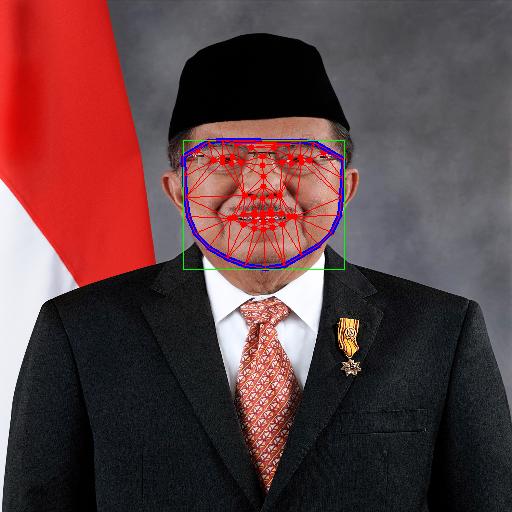

In [17]:
indexes_triangles = []
for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])
    cv2.line(draw_copy, pt1, pt2, (0, 0, 255))
    cv2.line(draw_copy, pt2, pt3, (0, 0, 255))
    cv2.line(draw_copy, pt3, pt1, (0, 0, 255))

    index_pt1 = np.where((points == pt1).all(axis=1))
    index_pt1 = extract_index_nparray(index_pt1)

    index_pt2 = np.where((points == pt2).all(axis=1))
    index_pt2 = extract_index_nparray(index_pt2)

    index_pt3 = np.where((points == pt3).all(axis=1))
    index_pt3 = extract_index_nparray(index_pt3)

    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
        triangle = [index_pt1, index_pt2, index_pt3]
        indexes_triangles.append(triangle)

cv2_imshow(draw_copy)

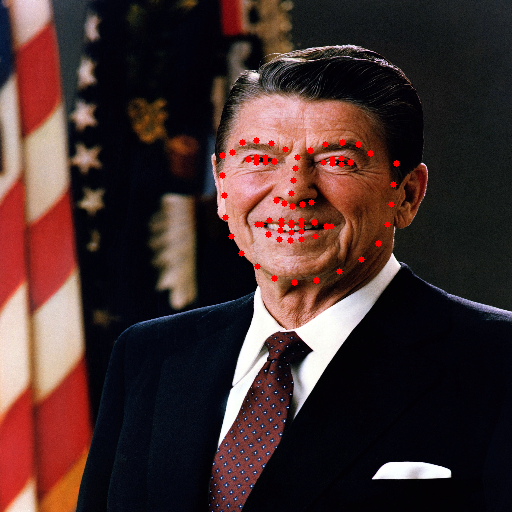

In [18]:
# Draw Copy 2
draw_copy2 = img2.copy()
img2_new_face = np.zeros(img2.shape, np.uint8)

# Face 2
faces = detector(gray_img2)
for face in faces:
    landmarks = predictor(gray_img2, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))
        cv2.circle(draw_copy2, (x,y), 3, (0, 0, 255), -1)
    
    points2 = np.array(landmarks_points2, np.int32)
    hull2 = cv2.convexHull(points2)

lines_space_mask = np.zeros_like(gray_img2)
lines_space_new_face = np.zeros_like(img2)

cv2_imshow(draw_copy2)

### Put it all together - Triangulation on both faces

In [19]:
# Compute the affine transforms of the triangles
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img1[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)

    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                        [tr1_pt2[0] - x, tr1_pt2[1] - y],
                        [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

    # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

    # Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

    # Reconstructing destination face
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

### Putting 1st face into 2nd face

In [20]:
# Face swapped (putting 1st face into 2nd face)
img2_face_mask = np.zeros_like(gray_img2)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, hull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

In [21]:
img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

In [22]:
(x, y, w, h) = cv2.boundingRect(hull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

In [23]:
seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.MIXED_CLONE)

### See the Results

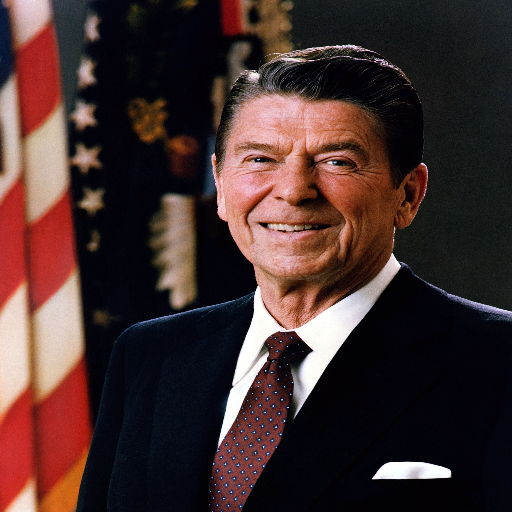

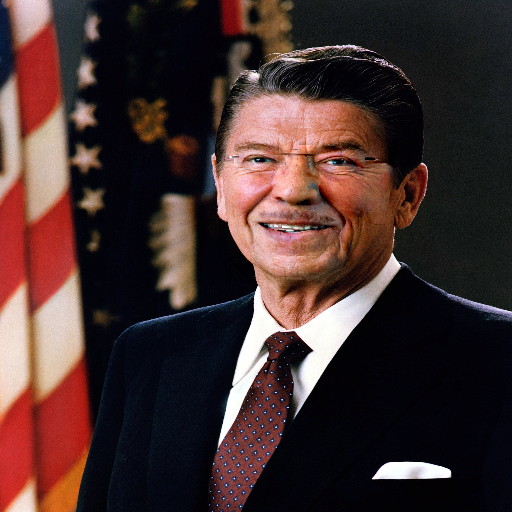

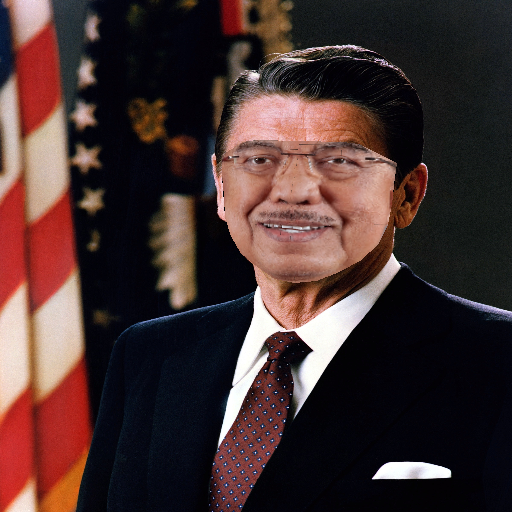

In [24]:
cv2_imshow(img2)
cv2_imshow(seamlessclone)
cv2_imshow(result)